In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Pandas/Practice4/car_cell.csv")

In [30]:
df.shape[0] - df.drop_duplicates().shape[0]
df = df.drop_duplicates()

<Axes: xlabel='selling_price', ylabel='owner'>

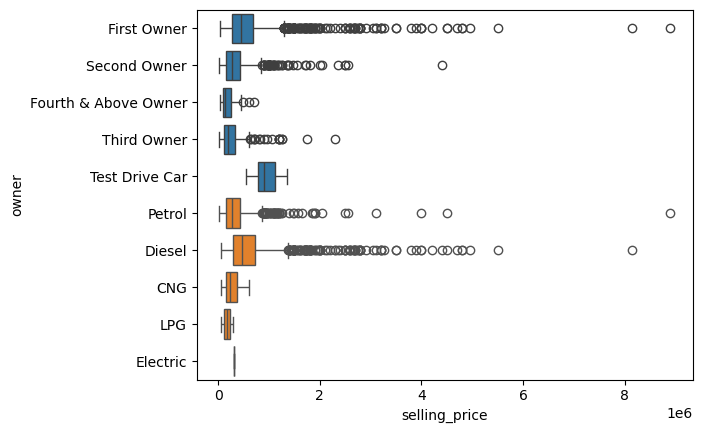

In [41]:
sns.boxplot(data=df, x="selling_price", y="owner")
sns.boxplot(data=df, x="selling_price", y="fuel")

In [61]:
df[df["fuel"] == "petrol"]["selling_price"].mean() < df[df["fuel"] == "petrol"]["selling_price"].median() 

False

In [57]:
df_encoded = pd.get_dummies(df, columns=["fuel", "owner"], dtype="int")

In [75]:
df_encoded.corr(method="spearman", numeric_only=True).round(2)

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.00,0.70,-0.56,0.00,0.07,-0.03,-0.06,-0.06,0.46,-0.15,-0.32,0.11,-0.25
selling_price,0.70,1.00,-0.31,-0.05,0.38,-0.00,-0.08,-0.36,0.35,-0.15,-0.22,0.09,-0.20
km_driven,-0.56,-0.31,1.00,0.01,0.32,0.00,0.04,-0.33,-0.37,0.11,0.26,-0.11,0.20
fuel_CNG,0.00,-0.05,0.01,1.00,-0.10,-0.00,-0.01,-0.10,-0.02,0.04,0.02,-0.01,-0.01
fuel_Diesel,0.07,0.38,0.32,-0.10,1.00,-0.02,-0.08,-0.97,-0.01,-0.02,0.01,-0.01,0.01
fuel_Electric,-0.03,-0.00,0.00,-0.00,-0.02,1.00,-0.00,-0.02,-0.02,-0.00,0.03,-0.00,-0.00
fuel_LPG,-0.06,-0.08,0.04,-0.01,-0.08,-0.00,1.00,-0.08,-0.03,0.01,0.02,-0.01,0.00
fuel_Petrol,-0.06,-0.36,-0.33,-0.10,-0.97,-0.02,-0.08,1.00,0.02,0.01,-0.02,0.01,-0.00
owner_First Owner,0.46,0.35,-0.37,-0.02,-0.01,-0.02,-0.03,0.02,1.00,-0.19,-0.78,-0.09,-0.38
owner_Fourth & Above Owner,-0.15,-0.15,0.11,0.04,-0.02,-0.00,0.01,0.01,-0.19,1.00,-0.09,-0.01,-0.04


<Axes: xlabel='selling_price', ylabel='seller_type'>

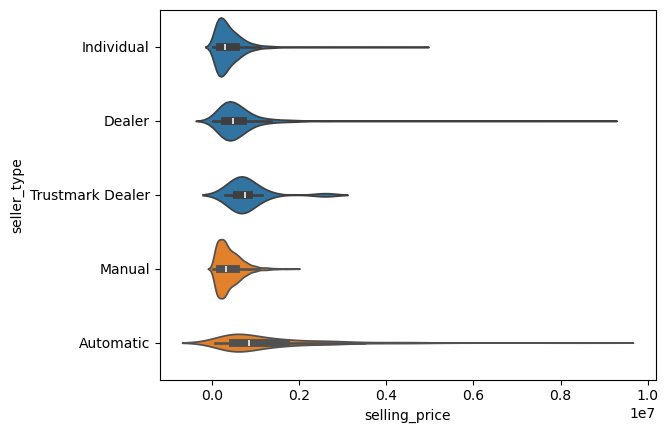

In [85]:
sns.violinplot(data=df_encoded, x="selling_price", y="seller_type")
sns.violinplot(data=df_encoded, x="selling_price", y="transmission")

In [94]:
from sklearn.preprocessing import LabelEncoder as le

df_encoded["seller_type_encoded"] = le().fit_transform(df_encoded["seller_type"])
df_encoded["transmission_encoded"] = le().fit_transform(df_encoded["transmission"])

df_encoded["seller_type_encoded"].corr(df_encoded["selling_price"], method="spearman").round(2)
df_encoded["transmission_encoded"].corr(df_encoded["selling_price"], method="spearman").round(2)


-0.31

<Axes: xlabel='km_driven', ylabel='selling_price'>

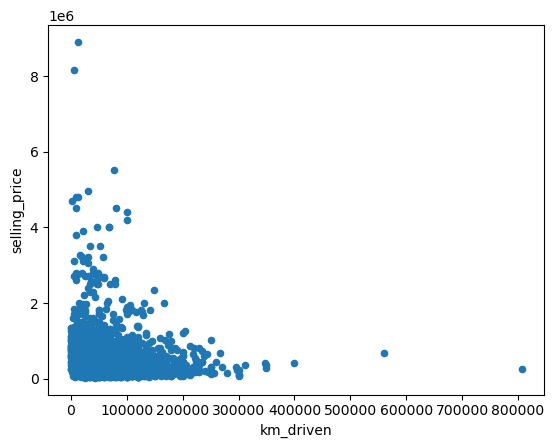

In [101]:
df_encoded.plot("km_driven", "selling_price", kind="scatter")

In [107]:
df_encoded["selling_price"].corr(df_encoded["year"]).round(2) #Между годом выпуска (year) и ценой автомобиля (selling_price) существует ЗАМЕТНАЯ прямая линейная взаимосвязь
df_encoded["selling_price"].corr(df_encoded["km_driven"]).round(2)

-0.19